## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np

# Study data files
mouse_metadata_path = os.path.join('Pymaceuticals', 'data', 'Mouse_metadata.csv')
study_results_path = os.path.join('Pymaceuticals', 'data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyComboDF = pd.merge(study_results, mouse_metadata, 
                                 how='outer', on='Mouse ID')
studyComboDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice in the DataFrame.
#pull unique counts of all fields
#studyComboDF.nunique()

#pull unique counts of mice only
numberOfMice = len(studyComboDF["Mouse ID"].unique())
numberOfMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMiceData = studyComboDF[studyComboDF.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicateMiceID = duplicateMiceData["Mouse ID"].unique()
duplicateMiceID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = studyComboDF[studyComboDF.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicateMiceData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#this option keeps one of the two rows of duplicate mice IDs
#cleanDF = studyComboDF.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

#fix to put duplicateMiceID in for hard-coded "g989"
cleanDF = studyComboDF[(studyComboDF['Mouse ID'] != 'g989')]
cleanDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [114]:
# Checking the number of mice in the clean DataFrame.
cleanDF.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
RegimentGB = cleanDF.groupby("Drug Regimen")
Regiment = RegimentGB.count().index
#Regiment
volumeMean = RegimentGB["Tumor Volume (mm3)"].mean()
#volumeMean
volumeMedian = RegimentGB["Tumor Volume (mm3)"].median()
#volumeMedian
volumeVariance = RegimentGB["Tumor Volume (mm3)"].var()
#volumeVariance
volumeStdDev = RegimentGB["Tumor Volume (mm3)"].std()
#volumeStdDev
volumeSEM = RegimentGB["Tumor Volume (mm3)"].sem()
#volumeSEM
# This method is the most straightforward, creating multiple series and putting them all together at the end.
#add to dataframe regimentSummary
regimentSummary = pd.DataFrame({"Drug Regiment": Regiment, "Mean Volume": volumeMean, "Median Volume": volumeMedian, 
                                "Variance Volume": volumeVariance, "Standard Deviation": volumeStdDev, 
                                "SEM": volumeSEM
                             })

#cleanup dataframe index
regimentSummary = regimentSummary.reset_index(drop=True)

regimentSummary

,Drug Regiment,Mean Volume,Median Volume,Variance Volume,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
regimentSimpleSummaryDF = pd.DataFrame(cleanDF.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}))
regimentSimpleSummaryDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

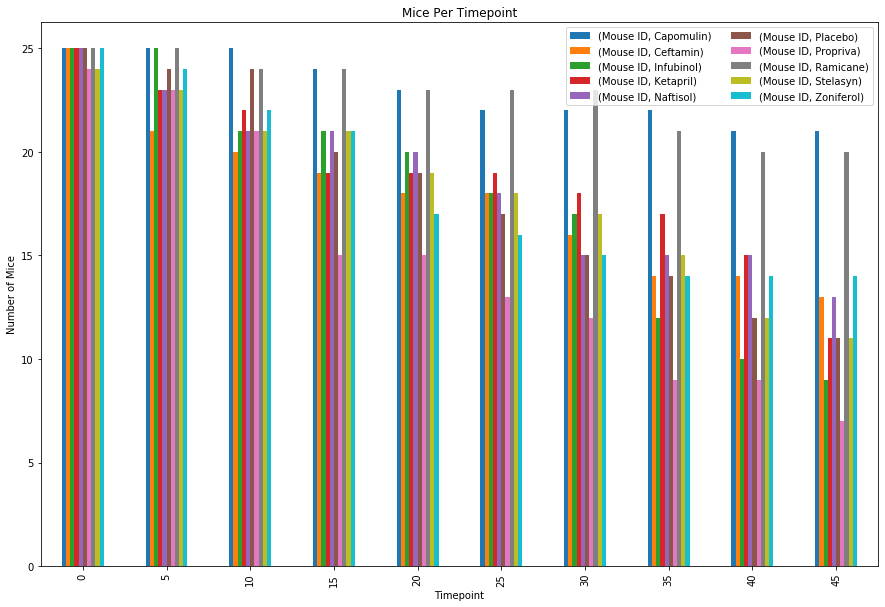

In [63]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#group by timepoints and drugs
RegimentTimeGB = cleanDF.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].nunique()
RegimentTimeGBDF = pd.DataFrame(RegimentTimeGB)
RegimentTimeGBDF.rename(index={0: "Timepoint", 1: "Drug Regimen", 2: "Mice"})
RegimentTimeGBDF

#bar multi plot
multi_plot = RegimentTimeGBDF.unstack().plot(kind="bar", figsize=(15, 10))

#label chart
multi_plot.set_title("Mice Per Timepoint")
multi_plot.set_xlabel('Timepoint')
multi_plot.set_ylabel('Number of Mice')
multi_plot.legend(ncol=2)

In [62]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


## Pie Plots

Text(0.5, 1.0, 'Mice By Gender')

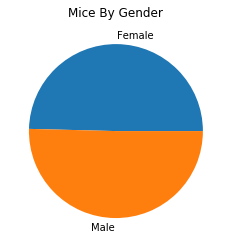

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = cleanDF.groupby(['Sex'])['Mouse ID'].nunique()
genderDF = pd.DataFrame(gender)
#genderDF.rename(index={0: "Sex", 1: "Mice"})
#genderDF
plot = genderDF.plot.pie(y="Mouse ID", label='', legend=None)
plot.set_title("Mice By Gender")


Text(0.5, 1.0, 'Mice By Gender')

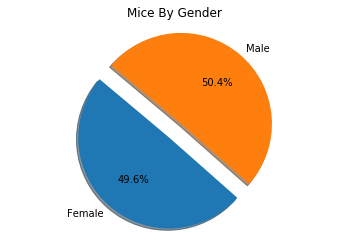

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = cleanDF['Sex'].unique()
counts = cleanDF.groupby(['Sex'])['Mouse ID'].nunique()
explode = (0.1, 0.1)
plt.pie(counts, labels=genders, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Mice By Gender")

## Quartiles, Outliers and Boxplots

In [116]:
#get max timepoint for each mouse into a Data Frame
finalTimepoint = cleanDF.groupby(['Mouse ID'])['Timepoint'].max()
finalTimepoint = pd.DataFrame(finalTimepoint)

#merge with original data set into new finalTumorVolumeDF Data Frame
finalTumorVolumeDF = finalTimepoint.merge(cleanDF, how='left', on=['Mouse ID','Timepoint'])
finalTumorVolumeDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [117]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#calculate average by drug
finalTumorVolumeDrug = finalTumorVolumeDF.groupby("Drug Regimen").mean()
#sort by final volume average
finalTumorVolumeDrugSort = finalTumorVolumeDrug.sort_values(by='Tumor Volume (mm3)', ascending=True)
#grab the four regimens of interest and convert from index to a list
regimensOfInterest = finalTumorVolumeDrugSort.iloc[0:4,0:0]
#convert top 4 to a list
regimensOfInterestList = list(regimensOfInterest.index.values)

upperBounds =[]
lowerBounds = []
#calculate IQR for outliers in top 4
for drug in regimensOfInterestList:
    eachDrug = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    quartiles = eachDrug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    upperBounds.append(upper_bound)
    lowerBounds.append(lower_bound)
    #regimensOfInterest.append(pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound}, index=[0]), ignore_index=False)

regimensOfInterest['Upper Bound'] = upperBounds
regimensOfInterest['Lower Bound'] = lowerBounds

#find outliers with volume less than lower_bound in top 4
#topRegimensOutliers = topRegimens.loc[(topRegimens['Tumor Volume (mm3)'] < lower_bound)]
#upperOutliers = finalTumorVolumeDrugSort.loc[(finalTumorVolumeDrugSort['Tumor Volume (mm3)'] > upper_bound)]
#print results
#print(f"Potential Low End Outliers (based on lower bound of {round(lower_bound, 2)}):")
#topRegimensOutliers
#print()

In [118]:
regimensOfInterest.reset_index(level=0, inplace=True)
regimensOfInterest

,Drug Regimen,Upper Bound,Lower Bound
0,Ramicane,54.306811,17.912664
1,Capomulin,51.832015,20.704562
2,Propriva,83.043811,28.765296
3,Ceftamin,87.666458,25.355450


In [90]:
outliers =[]
for drug in regimensOfInterestList:
    if finalTumorVolumeDF.loc[finalTumorVolumeDF['Tumor Volume (mm3)'] >= regimensOfInterest['Upper Bound']



54.30681135
51.83201549
87.66645829999999
82.74144559000001


In [ ]:
for drug in regimensOfInterestList
    

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
224,c139,45,72.226731,2,Infubinol,Male,11,28
243,y163,45,67.685569,3,Infubinol,Female,17,27
253,k483,45,66.196912,3,Infubinol,Female,20,30
279,z581,45,62.754451,3,Infubinol,Female,24,25
...,...,...,...,...,...,...,...,...
1844,l897,45,38.846876,1,Capomulin,Male,17,19
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
